In [2]:
import numpy as np
import pandas as pd
import glob
import os

In [3]:
dir = os.chdir("/content/drive/MyDrive/Colab Notebooks/BBC_Data")
print(f'Directory change to {os.getcwd()}')

Directory change to /content/drive/MyDrive/Colab Notebooks/BBC_Data


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
def import_data(folders_n, def_path):
  filename = [path + "/News Articles/" + folder + "/" + "*.txt"
     for path,folder in zip([def_path]*len(folders_n), folders_n)]
  temp_doc = []
  print(filename)
  # tags 
  for x in filename:
    data = glob.glob(x) 
    for y in data:
      with open(y, encoding="latin-1") as f:
        topic = x.split('/')[len(x.split('/'))-2] 
        # print('me',topic)
        line = f.readlines()
        # head = line[0].strip()
        body = ''.join([l.strip() for l in line[1:]])
        temp_doc.append([topic,body])
    print(f"Loading data from \033[1m{topic}\033[0m directory")
    print("\nEntire Data is loaded successfully")

  return temp_doc

In [5]:
folders_n = ['business','entertainment','politics','sport','tech']
doc = import_data(folders_n = folders_n, def_path = os.getcwd())
# docs = load_data(folder_names = folders_n, root_path = os.getcwd())


['/content/drive/MyDrive/Colab Notebooks/BBC_Data/News Articles/business/*.txt', '/content/drive/MyDrive/Colab Notebooks/BBC_Data/News Articles/entertainment/*.txt', '/content/drive/MyDrive/Colab Notebooks/BBC_Data/News Articles/politics/*.txt', '/content/drive/MyDrive/Colab Notebooks/BBC_Data/News Articles/sport/*.txt', '/content/drive/MyDrive/Colab Notebooks/BBC_Data/News Articles/tech/*.txt']
Loading data from business directory

Entire Data is loaded successfully
Loading data from entertainment directory

Entire Data is loaded successfully
Loading data from politics directory

Entire Data is loaded successfully
Loading data from sport directory

Entire Data is loaded successfully
Loading data from tech directory

Entire Data is loaded successfully


In [6]:
# print(type(doc))
doc1 = pd.DataFrame(doc, columns = ['category','text'])
length = len(doc1)
# print(length)
doc1.head(length)
# print(doc1)

,category,text
0,business,Ethiopia produced 14.27 million tonnes of crop...
1,business,Ask Jeeves has become the third leading online...
2,business,Budget airline Ryanair has placed an order for...
3,business,Crude oil prices surged back above the $47 a b...
4,business,Revenues at media group Reuters slipped 11% du...
...,...,...
2220,tech,Now that a critical mass of people have embrac...
2221,tech,Video games on consoles and computers proved m...
2222,tech,Mobile phones are still enjoying a boom time i...
2223,tech,Music and film fans will be able to control th...


In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# download necessary resources for NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [8]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    text = ' '.join(tokens)
    return text

doc1['text_processed'] = doc1['text'].apply(preprocess_text)
print(doc1['text'])


0       Ethiopia produced 14.27 million tonnes of crop...
1       Ask Jeeves has become the third leading online...
2       Budget airline Ryanair has placed an order for...
3       Crude oil prices surged back above the $47 a b...
4       Revenues at media group Reuters slipped 11% du...
                              ...                        
2220    Now that a critical mass of people have embrac...
2221    Video games on consoles and computers proved m...
2222    Mobile phones are still enjoying a boom time i...
2223    Music and film fans will be able to control th...
2224    Cyberspace is becoming a very popular destinat...
Name: text, Length: 2225, dtype: object


In [9]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [16]:
# import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

doc1 = pd.DataFrame(doc, columns = ['category','text'])
df = doc1
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], test_size=0.2, random_state=112)
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
#print(vectorizer)
Bmodel= MultinomialNB()
Bmodel.fit(X_train, y_train)
PredT= Bmodel.predict(X_train)
preds = Bmodel.predict(X_test)
accuracy= accuracy_score(y_test, preds)
acc= accuracy_score(y_train,PredT)
#acc= round(acc, 2)
print("AccuracyPredict:", accuracy)
print("AccuracyTrain:",acc)
# print the classification report and confusion matrix
print(classification_report(y_test, preds))
#print(confusion_matrix(y_test, preds))
#cross-validation
#ScoreS = cross_val_score(Bmodel, X_train, y_train, cv=7)
#print('Score', ScoreS)
#scores = cross_val_score(doc1, category, text, cv=5)

# print the cross-validation scores
#print('Cross-validation scores:', scores)




AccuracyPredict: 0.9797752808988764
AccuracyTrain: 0.9960674157303371
               precision    recall  f1-score   support

     business       0.98      0.98      0.98        93
entertainment       1.00      0.96      0.98        83
     politics       0.99      0.97      0.98        92
        sport       1.00      0.99      1.00       103
         tech       0.93      1.00      0.96        74

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445



CV: 2, Train error: 0.0337078651685393, Test error: 0.020224719101123556
CV: 3, Train error: 0.029209085420440206, Test error: 0.020224719101123556
CV: 4, Train error: 0.02528089887640439, Test error: 0.020224719101123556
CV: 5, Train error: 0.025842696629213457, Test error: 0.020224719101123556
CV: 6, Train error: 0.02752373585706913, Test error: 0.020224719101123556
CV: 7, Train error: 0.025825448289552022, Test error: 0.020224719101123556
CV: 8, Train error: 0.024711651112996336, Test error: 0.020224719101123556
CV: 9, Train error: 0.0263976482250593, Test error: 0.020224719101123556


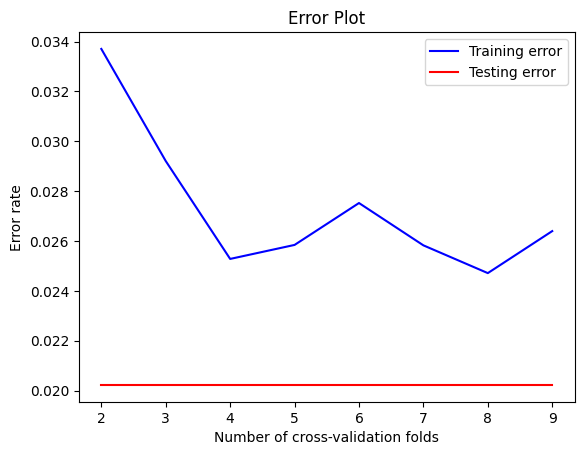

In [ ]:
import matplotlib.pyplot as plt

doc1 = pd.DataFrame(doc, columns = ['category','text'])
df = doc1
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], test_size=0.2, random_state=112)
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

train_errors = []
test_errors = []

Bmodel = MultinomialNB()

for i in range(2, 10):
    cv_scores = cross_val_score(Bmodel, X_train, y_train, cv=i)
    train_error = 1 - np.mean(cv_scores)
    test_error = 1 - accuracy_score(y_test, Bmodel.fit(X_train, y_train).predict(X_test))
    train_errors.append(train_error)
    test_errors.append(test_error)
    print('CV: {}, Train error: {}, Test error: {}'.format(i, train_error, test_error))

# Plot the errors
plt.plot(range(2, 10), train_errors, 'b', label='Training error')
plt.plot(range(2, 10), test_errors, 'r', label='Testing error')
plt.xlabel('Number of cross-validation folds')
plt.ylabel('Error rate')
plt.title('Error Plot')
plt.legend(loc='best')
plt.show()


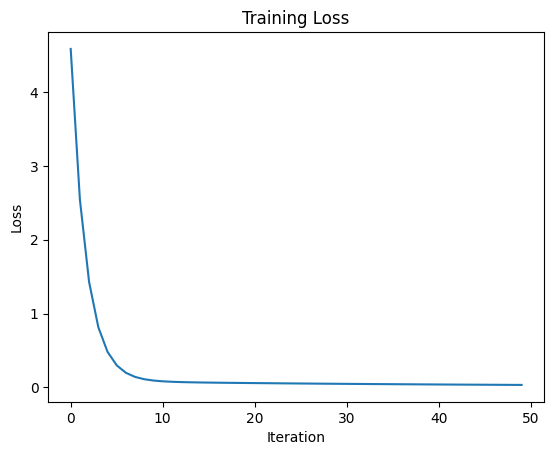

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# generate some random data
x = np.random.rand(100)
y = 2*x + 1 + 0.1*np.random.randn(100)

# initialize the weights and learning rate
w = np.zeros((1,))
b = np.zeros((1,))
lr = 0.1

# define the loss function (mean squared error)
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# train the model
loss_history = []
for i in range(50):
    # compute the predictions
    y_pred = w*x + b
    
    # compute the loss
    loss = mse_loss(y, y_pred)
    
    # compute the gradients
    dw = np.mean(2*(y_pred - y)*x)
    db = np.mean(2*(y_pred - y))
    
    # update the weights
    w -= lr*dw
    b -= lr*db
    
    # record the loss
    loss_history.append(loss)
    
# plot the loss function over time
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()



In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# load the data
doc1 = pd.DataFrame(doc, columns=['category', 'text'])

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(doc1['text'], doc1['category'], test_size=0.2)

# vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# define the hyperparameter grid to search over
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100],
              'fit_prior': [True, False],
              'class_prior': [None, [0.25, 0.25, 0.25, 0.25], [0.4, 0.3, 0.2, 0.1]]}

# create a MultinomialNB classifier object
Bmodel = MultinomialNB()

# perform grid search and find the best hyperparameters
grid = GridSearchCV(estimator=Bmodel, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

# print the best hyperparameters and their corresponding scores
print("Best hyperparameters:", grid.best_params_)
#print("Best cross-validation score:", grid.best_score_)

# evaluate the performance of the model with the best hyperparameters on the test set
best_model = grid.best_estimator_
preds = best_model.predict(X_test)
accuracy = np.mean(preds == y_test)
print("Accuracy:", accuracy)

# print the classification report and confusion matrix
training_accuracy = best_model.score(X_train, y_train)
print(classification_report(y_test, preds))
#print(confusion_matrix(y_test, preds))


Best hyperparameters: {'alpha': 0.01, 'class_prior': None, 'fit_prior': False}
Accuracy: 0.9820224719101124
               precision    recall  f1-score   support

     business       0.97      0.97      0.97       103
entertainment       1.00      1.00      1.00        67
     politics       0.95      0.99      0.97        89
        sport       1.00      0.98      0.99       107
         tech       1.00      0.97      0.99        79

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445



/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py", line 779, in fit
    self._update_class_log_prior(class_prior=class_prior)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py", line 595, in _update_class_log_prior
    raise ValueError("Number of priors must match number of